# Module import

In [24]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

home_dir = os.path.abspath(os.path.join('..'))
sys.path.append(home_dir)
# if module_path not in sys.path:
# 	sys.path.append(module_path+"\\Common_Module")
from lib.utils import *
from lib.transmittancefunc import *
from lib.propagator import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## square beam tilt example

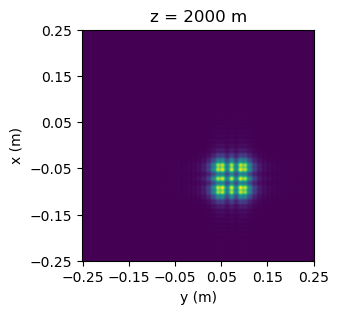

In [76]:
# square beam propagation example
METER = 1
NM = METER * 1e-9
L1 = 0.5    # side length (m)
M = 250     # No. of samples
dx1 = L1/M  # source sample interval
x1 = np.linspace(-L1/2, L1/2-dx1, M, endpoint=True) # source coordinates
y1 = x1

wavelength = 500 * NM
k = 2*np.pi / wavelength    # wavenumber
w = 0.051       # source half-width (m)
z = 2000 # propagation distance (m)

X1, Y1 = np.meshgrid(x1, y1)
u1 = rect(X1/(2*w)) * rect(Y1/(2*w))    # source field
alpha_deg = np.rad2deg(5e-5)
theta_deg = 45
u1 = tilt(u1, L1, wavelength, alpha_deg, theta_deg)
u2 = FresnelpropTF(u1, L1, wavelength, z) # propagation
I1 = np.abs(u2**2)                      # source irradiance

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(3, 3))
# ax = axes.ravel()

axes.imshow(I1, extent=(-L1/2, L1/2, -L1/2, L1/2))
axes.axis('equal')
axes.set_xlabel('y (m)')
axes.set_xticks(np.arange(-L1/2, L1/2+dx1, dx1*50))
axes.set_yticks(np.arange(-L1/2, L1/2+dx1, dx1*50))
axes.set_ylabel('x (m)')
axes.set_title(f'z = {z} m')
plt.show()

## square beam focus example

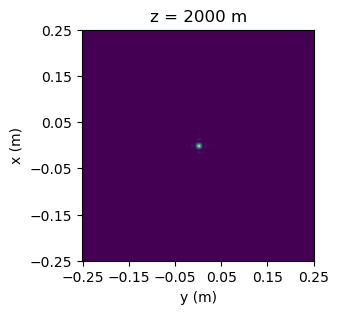

In [5]:
# square beam propagation example
METER = 1
NM = METER * 1e-9
L1 = 0.5    # side length (m)
M = 250     # No. of samples
dx1 = L1/M  # source sample interval
x1 = np.linspace(-L1/2, L1/2-dx1, M, endpoint=True) # source coordinates
y1 = x1

wavelength = 500 * NM
k = 2*np.pi / wavelength    # wavenumber
w = 0.051       # source half-width (m)
z = 2000 # propagation distance (m)

X1, Y1 = np.meshgrid(x1, y1)
u1 = rect(X1/(2*w)) * rect(Y1/(2*w))    # source field
zf = 2000

u1 = focus(u1, L1, wavelength, zf)
u2 = FresnelpropTF(u1, L1, wavelength, z) # propagation
I1 = np.abs(u2**2)                      # source irradiance

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(3, 3))
# ax = axes.ravel()

axes.imshow(I1, extent=(-L1/2, L1/2, -L1/2, L1/2))
axes.axis('equal')
axes.set_xlabel('y (m)')
axes.set_ylabel('x (m)')
axes.set_xticks(np.arange(-L1/2, L1/2+dx1, dx1*50))
axes.set_yticks(np.arange(-L1/2, L1/2+dx1, dx1*50))
axes.set_title(f'z = {z} m')
plt.show()

## cos grating example

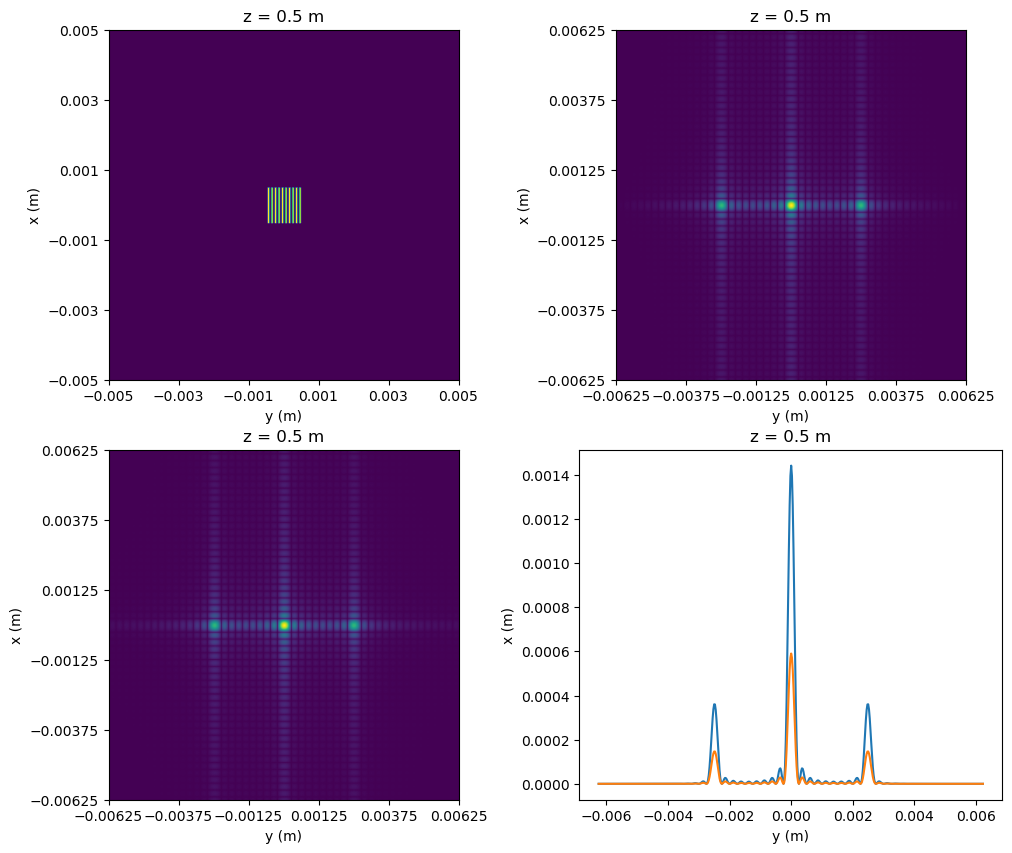

In [111]:
METER = 1
UM = METER * 1e-6
NM = METER * 1e-9

wavelength = 0.5 * UM
f = 0.5 * METER # propagation distance
P = 1e-4 * METER # grating period
D = 1.02e-3 * METER # grating side length

L1 = 1e-2 * METER # array side length
M = 500 # Num samples
dx1 = L1/M # sample interval
x1 = np.linspace(-L1/2, L1/2-dx1, M, endpoint=True)
X, Y = np.meshgrid(x1, x1)

u1 = cosGrating(X=X, Y=Y, P=P, D=D)
I1 = np.abs(u1)**2
u2, L2 = FraunhoferProp(u1, L1, wavelength, f)
dx2 = L2/M
x2 = np.linspace(-L2/2, L2/2-dx2, M, endpoint=True)
X2, Y2 = np.meshgrid(x2, x2)
lz = wavelength * f
k = 2*np.pi / wavelength

u2a = np.exp(1j*k*f)/(1j*lz) * D**2/2 * np.sinc(D/lz*Y2) * \
(np.sinc(D/lz*X2) - 1/2*np.sinc(D/lz*(X2+lz/P)) - 1/2*np.sinc(D/lz*(X2-lz/P)))

I2 = np.abs(u2)**2
I2a = np.abs(u2a)**2

# analytic function

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
ax = axes.ravel()

ax[0].imshow(I1, extent=(-L1/2, L1/2, -L1/2, L1/2))
# ax[0].axis('equal')
ax[0].set_xlabel('y (m)')
ax[0].set_ylabel('x (m)')
ax[0].set_xticks(np.arange(-L1/2, L1/2+dx1, dx1*100))
ax[0].set_yticks(np.arange(-L1/2, L1/2+dx1, dx1*100))
ax[0].set_title(f'z = {f} m')

ax[1].imshow(I2**0.3, extent=(-L2/2, L2/2, -L2/2, L2/2))
# ax[1].axis('equal')
ax[1].set_xlabel('y (m)')
ax[1].set_ylabel('x (m)')
ax[1].set_xticks(np.arange(-L2/2, L2/2+dx2, dx2*100))
ax[1].set_yticks(np.arange(-L2/2, L2/2+dx2, dx2*100))
ax[1].set_title(f'z = {f} m')

ax[2].imshow(I2a**0.3, extent=(-L2/2, L2/2, -L2/2, L2/2))
# ax[2].axis('equal')
ax[2].set_xlabel('y (m)')
ax[2].set_ylabel('x (m)')
ax[2].set_xticks(np.arange(-L2/2, L2/2+dx2, dx2*100))
ax[2].set_yticks(np.arange(-L2/2, L2/2+dx2, dx2*100))
ax[2].set_title(f'z = {f} m')

ax[3].plot(x2, I2[int(L2/M+1), :])
ax[3].plot(x2, I2a[int(L2/M+1), :])
# ax[3].axis('equal')
ax[3].set_xlabel('y (m)')
ax[3].set_ylabel('x (m)')
# ax[3].set_xticks(np.arange(-L2/2, L2/2+dx2, dx2*100))
# ax[3].set_yticks(np.arange(-L2/2, L2/2+dx2, dx2*100))
ax[3].set_title(f'z = {f} m')
plt.show()

## square grating example

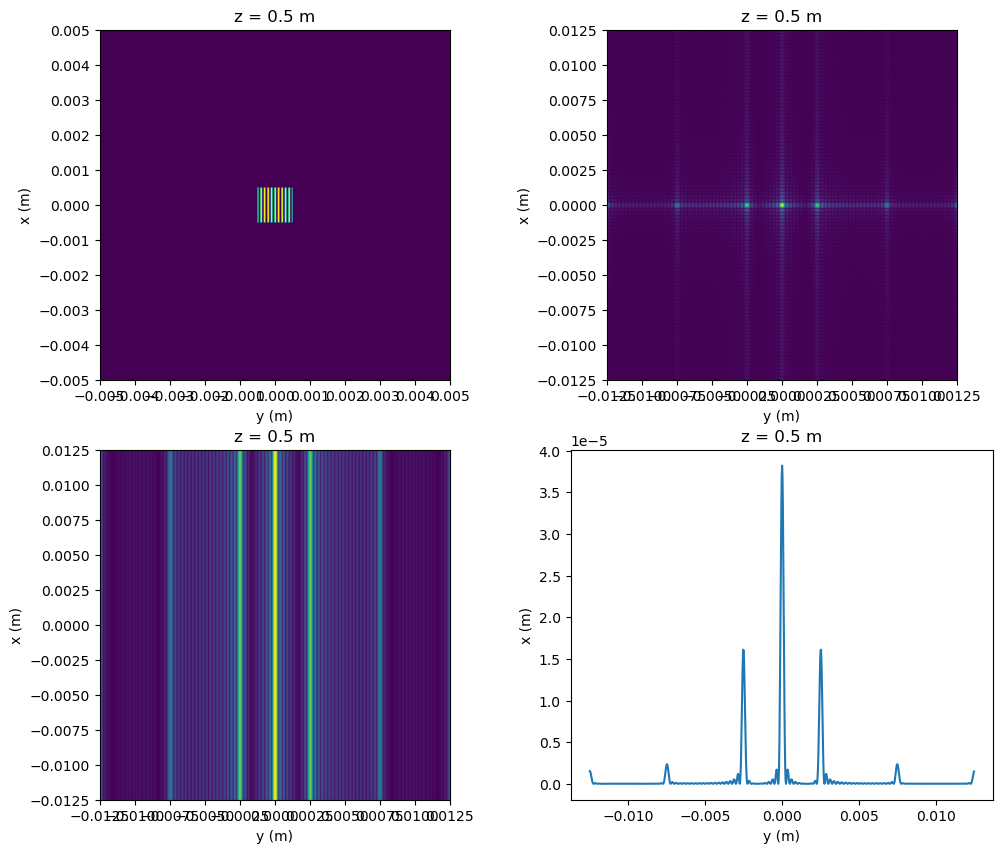

In [172]:
METER = 1
UM = METER * 1e-6
NM = METER * 1e-9

wavelength = 0.5 * UM
f = 0.5 * METER # propagation distance
P = 1e-4 * METER # grating period
D = 1e-3 * METER # grating side length

L1 = 1e-2 * METER # array side length
M = 1000  # Num samples
dx1 = L1/M # sample interval
x1 = np.linspace(-L1/2, L1/2-dx1, M, endpoint=True)
X, Y = np.meshgrid(x1, x1)

u1 = squareGrating(X=X, Y=Y, P=P, D=D)
I1 = np.abs(u1)**2
u2, L2 = FraunhoferProp(u1, L1, wavelength, f)
dx2 = L2/M
x2 = np.linspace(-L2/2, L2/2-dx2, M, endpoint=True)
X2, Y2 = np.meshgrid(x2, x2)

lz = wavelength * f
k = 2*np.pi / wavelength

# square grating anlytical model
u2a = np.zeros((1, M))
for n in np.arange(-5, 6):
    ut = np.sinc(n/2) * np.sinc(D/lz*(x2 - n*lz/P))
    u2a = u2a + ut
u2a = D**2 / (2*lz) * u2a
u2a = np.tile(u2a, (M, 1))

I2 = np.abs(u2)**2
I2a = np.abs(u2a)**2

# analytic function

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
ax = axes.ravel()

ax[0].imshow(I1, extent=(-L1/2, L1/2, -L1/2, L1/2))
# ax[0].axis('equal')
ax[0].set_xlabel('y (m)')
ax[0].set_ylabel('x (m)')
ax[0].set_xticks(np.arange(-L1/2, L1/2+dx1, dx1*100))
ax[0].set_yticks(np.arange(-L1/2, L1/2+dx1, dx1*100))
ax[0].set_title(f'z = {f} m')

ax[1].imshow(I2**0.3, extent=(-L2/2, L2/2, -L2/2, L2/2))
# ax[1].axis('equal')
ax[1].set_xlabel('y (m)')
ax[1].set_ylabel('x (m)')
ax[1].set_xticks(np.arange(-L2/2, L2/2+dx2, dx2*100))
ax[1].set_yticks(np.arange(-L2/2, L2/2+dx2, dx2*100))
ax[1].set_title(f'z = {f} m')

ax[2].imshow(I2a**0.3, extent=(-L2/2, L2/2, -L2/2, L2/2))
# ax[2].axis('equal')
ax[2].set_xlabel('y (m)')
ax[2].set_ylabel('x (m)')
ax[2].set_xticks(np.arange(-L2/2, L2/2+dx2, dx2*100))
ax[2].set_yticks(np.arange(-L2/2, L2/2+dx2, dx2*100))
ax[2].set_title(f'z = {f} m')

ax[3].plot(x2, I2[int(L2/M+1), :])
# ax[3].plot(x2, I2a[int(L2/M+1), :])
# ax[3].axis('equal')
ax[3].set_xlabel('y (m)')
ax[3].set_ylabel('x (m)')
# ax[3].set_xticks(np.arange(-L2/2, L2/2+dx2, dx2*100))
# ax[3].set_yticks(np.arange(-L2/2, L2/2+dx2, dx2*100))
ax[3].set_title(f'z = {f} m')
plt.show()

## one-dimensional square grating model

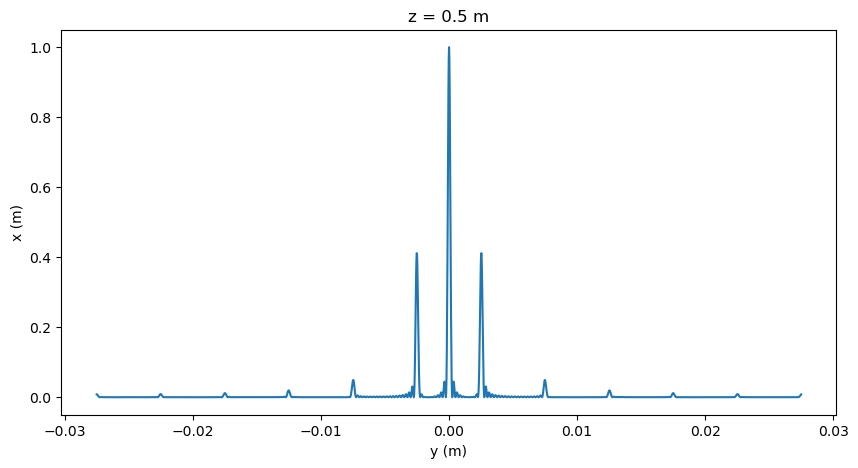

In [196]:
METER = 1
UM = METER * 1e-6
NM = METER * 1e-9

wavelength = 0.5 * UM
f = 0.5 * METER # propagation distance
P = 1e-4 * METER # grating period
D = 1e-3 * METER # grating side length

L1 = 1e-2 * METER # array side length
M = 2200  # Num samples
dx1 = L1/M # sample interval
x1 = np.linspace(-L1/2, L1/2-dx1, M, endpoint=True)
X, Y = np.meshgrid(x1, x1)
lz = wavelength * f
k = 2*np.pi / wavelength

u1 = squareGrating1D(X, P, D)
I1 = np.abs(u1)**2

u2 = np.sqrt(1/lz) * np.fft.ifftshift(np.fft.fft(np.fft.fftshift(u1[int(L/M+1), :]))) * dx1
L2 = lz/dx1
x2 = np.linspace(-L2/2, L2/2-dx1, M, endpoint=True)
I2 = np.abs(u2)**2

# analytic function
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

ax.plot(x2, I2)
ax.set_xlabel('y (m)')
ax.set_ylabel('x (m)')
ax.set_title(f'z = {f} m')
plt.show()

## periodic model

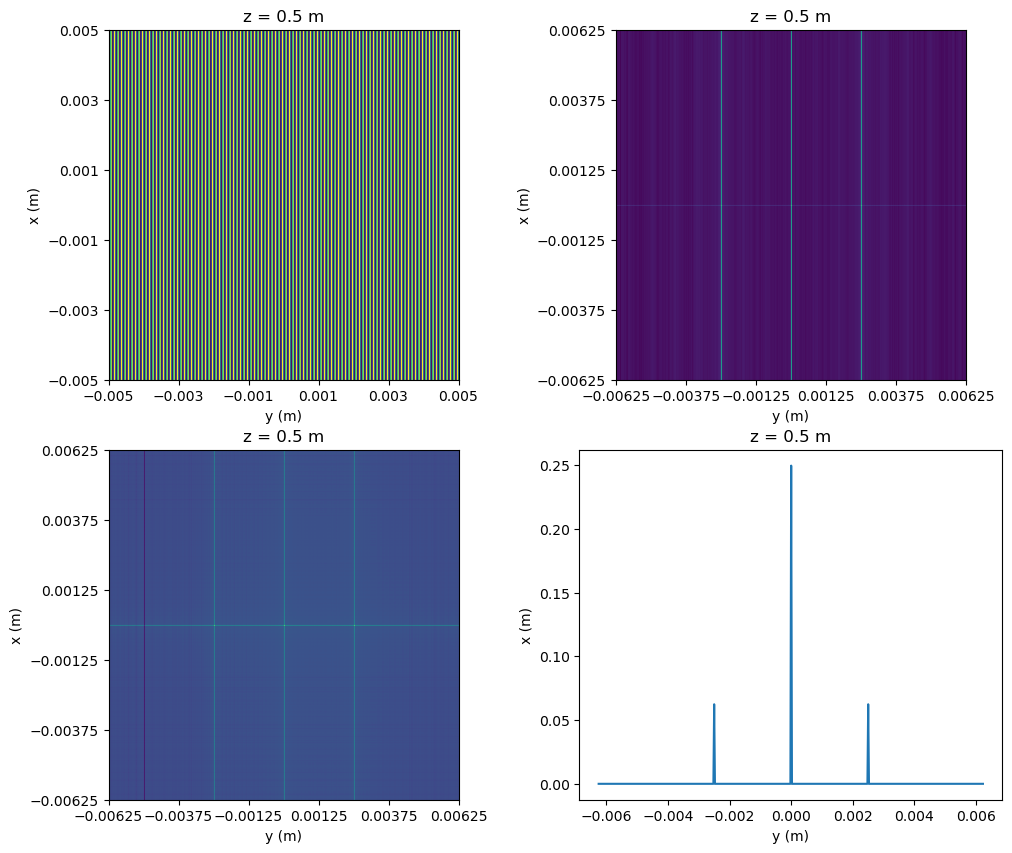

In [219]:
METER = 1
UM = METER * 1e-6
NM = METER * 1e-9

wavelength = 0.5 * UM
f = 0.5 * METER # propagation distance
P = 1e-4 * METER # grating period
D = 1e-2 * METER # grating side length

L1 = 1e-2 * METER # array side length
M = 500 # Num samples
dx1 = L1/M # sample interval
x1 = np.linspace(-L1/2, L1/2-dx1, M, endpoint=True)
X, Y = np.meshgrid(x1, x1)

u1 = cosGrating(X=X, Y=Y, P=P, D=D)
I1 = np.abs(u1)**2
u2, L2 = FraunhoferProp(u1, L1, wavelength, f)
dx2 = L2/M
x2 = np.linspace(-L2/2, L2/2-dx2, M, endpoint=True)
X2, Y2 = np.meshgrid(x2, x2)
lz = wavelength * f
k = 2*np.pi / wavelength

u2a = np.exp(1j*k*f)/(1j*lz) * D**2/2 * np.sinc(D/lz*Y2) * \
(np.sinc(D/lz*X2) - 1/2*np.sinc(D/lz*(X2+lz/P)) - 1/2*np.sinc(D/lz*(X2-lz/P)))

I2 = np.abs(u2)**2
I2a = np.abs(u2a)**2

# analytic function

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
ax = axes.ravel()

ax[0].imshow(I1, extent=(-L1/2, L1/2, -L1/2, L1/2))
# ax[0].axis('equal')
ax[0].set_xlabel('y (m)')
ax[0].set_ylabel('x (m)')
ax[0].set_xticks(np.arange(-L1/2, L1/2+dx1, dx1*100))
ax[0].set_yticks(np.arange(-L1/2, L1/2+dx1, dx1*100))
ax[0].set_title(f'z = {f} m')

ax[1].imshow(I2**0.01, extent=(-L2/2, L2/2, -L2/2, L2/2))
# ax[1].axis('equal')
ax[1].set_xlabel('y (m)')
ax[1].set_ylabel('x (m)')
ax[1].set_xticks(np.arange(-L2/2, L2/2+dx2, dx2*100))
ax[1].set_yticks(np.arange(-L2/2, L2/2+dx2, dx2*100))
ax[1].set_title(f'z = {f} m')

ax[2].imshow(I2a**0.01, extent=(-L2/2, L2/2, -L2/2, L2/2))
# ax[2].axis('equal')
ax[2].set_xlabel('y (m)')
ax[2].set_ylabel('x (m)')
ax[2].set_xticks(np.arange(-L2/2, L2/2+dx2, dx2*100))
ax[2].set_yticks(np.arange(-L2/2, L2/2+dx2, dx2*100))
ax[2].set_title(f'z = {f} m')

ax[3].plot(x2, (I2*dx2*dx2/(L1*L1)).sum(axis=0))
# ax[3].axis('equal')
ax[3].set_xlabel('y (m)')
ax[3].set_ylabel('x (m)')
# ax[3].set_xticks(np.arange(-L2/2, L2/2+dx2, dx2*100))
# ax[3].set_yticks(np.arange(-L2/2, L2/2+dx2, dx2*100))
ax[3].set_title(f'z = {f} m')
plt.show()

# Exercise

## 6.2

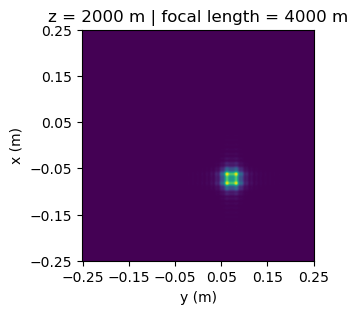

In [6]:
# square beam propagation example
METER = 1
NM = METER * 1e-9

L1 = 0.5 * METER    # side length (m)
M = 250     # No. of samples
dx1 = L1/M  # source sample interval
x1 = np.linspace(-L1/2, L1/2-dx1, M, endpoint=True) # source coordinates
y1 = x1

wavelength = 500 * NM
k = 2*np.pi / wavelength    # wavenumber
w = 0.051 * METER       # source half-width (m)

z = 2000 * METER # propagation distance (m)
zf = 4000 * METER # focal length

X1, Y1 = np.meshgrid(x1, y1)
u1 = rect(X1/(2*w)) * rect(Y1/(2*w))    # source field

alpha_deg = np.rad2deg(5e-5)
theta_deg = 45
u1 = tilt(u1, L1, wavelength, alpha_deg, theta_deg)
u1 = focus(u1, L1, wavelength, zf)
u2 = FresnelpropTF(u1, L1, wavelength, z) # propagation
I1 = np.abs(u2**2)                      # source irradiance

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(3, 3))
# ax = axes.ravel()

axes.imshow(I1, extent=(-L1/2, L1/2, -L1/2, L1/2))
axes.axis('equal')
axes.set_xlabel('y (m)')
axes.set_xticks(np.arange(-L1/2, L1/2+dx1, dx1*50))
axes.set_yticks(np.arange(-L1/2, L1/2+dx1, dx1*50))
axes.set_ylabel('x (m)')
axes.set_title(f'z = {z} m | focal length = {zf} m')
plt.show()

## 6.3

### (b)

In [ ]:
d

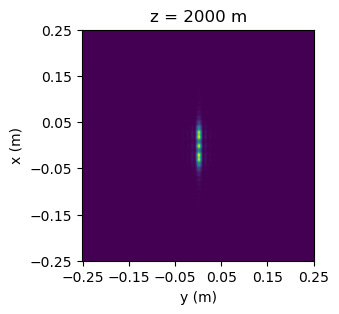

In [22]:
# square beam propagation example
METER = 1
NM = METER * 1e-9
L1 = 0.5    # side length (m)
M = 250     # No. of samples
dx1 = L1/M  # source sample interval
x1 = np.linspace(-L1/2, L1/2-dx1, M, endpoint=True) # source coordinates
y1 = x1

wavelength = 500 * NM
k = 2*np.pi / wavelength    # wavenumber
w = 0.051       # source half-width (m)
z = 2000 # propagation distance (m)

X1, Y1 = np.meshgrid(x1, y1)
u1 = rect(X1/(2*w)) * rect(Y1/(2*w))    # source field
zf = 2000

u1 = cylindricalfocus(u1, L1, wavelength, zf)
u2 = FresnelpropTF(u1, L1, wavelength, z) # propagation
I1 = np.abs(u2**2)                      # source irradiance

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(3, 3))
# ax = axes.ravel()

axes.imshow(I1, extent=(-L1/2, L1/2, -L1/2, L1/2))
axes.axis('equal')
axes.set_xlabel('y (m)')
axes.set_ylabel('x (m)')
axes.set_xticks(np.arange(-L1/2, L1/2+dx1, dx1*50))
axes.set_yticks(np.arange(-L1/2, L1/2+dx1, dx1*50))
axes.set_title(f'z = {z} m')
plt.show()

## 6.4

### (a)

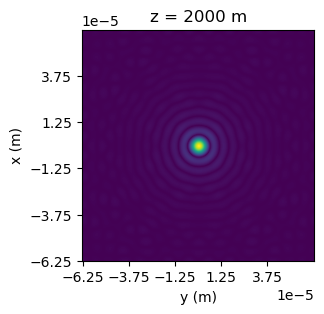

In [51]:
METER = 1
NM = METER * 1e-9
MM = METER * 1e-3

wavelength = 500 * NM
L = 250 * MM
M = 250
f = 250 * MM
wl = 12.5 * MM
D = 2 * wl
dx1 = L / M
x = np.linspace(-L/2, L/2-dx1, M, endpoint=True)
X, Y = np.meshgrid(x, x)

u1 = circle_func(X, Y, wl)
u2, L2 = FraunhoferProp(u1, L, wavelength, f)
I2 = np.abs(u2)**2
dx2 = L2/M
x2 = np.linspace(-L2/2, L2/2-dx2, M, endpoint=True)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(3, 3))
# ax = axes.ravel()

axes.imshow(I2**0.5, extent=(-L2/2, L2/2, -L2/2, L2/2))
axes.axis('equal')
axes.set_xlabel('y (m)')
axes.set_ylabel('x (m)')
axes.set_xticks(x2[::50])
axes.set_yticks(x2[::50])
axes.set_title(f'z = {z} m')
plt.show()

### (b)

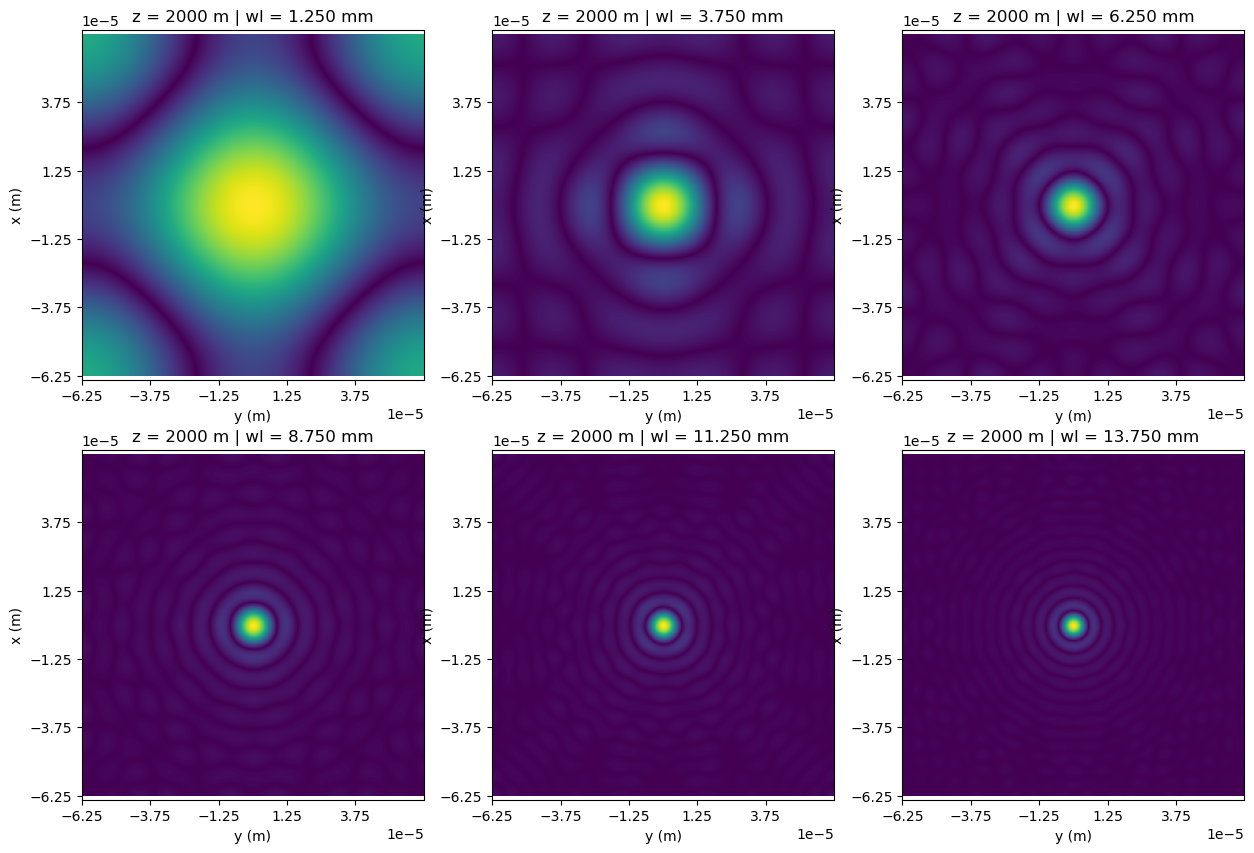

In [68]:
METER = 1
NM = METER * 1e-9
MM = METER * 1e-3

wavelength = 500 * NM
L = 250 * MM
M = 250
f = 250 * MM
wl = 12.5 * MM
D = 2 * wl
dx1 = L / M
x = np.linspace(-L/2, L/2-dx1, M, endpoint=True)
X, Y = np.meshgrid(x, x)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
ax = axes.ravel()


for ax_idx, r in enumerate(np.arange(0.1, 1.2, 0.2)*wl):
    u1 = circle_func(X, Y, r)
    u2, L2 = FraunhoferProp(u1, L, wavelength, f)
    I2 = np.abs(u2)**2
    dx2 = L2/M
    x2 = np.linspace(-L2/2, L2/2-dx2, M, endpoint=True)

    ax[ax_idx].imshow(I2**0.5, extent=(-L2/2, L2/2, -L2/2, L2/2))
    ax[ax_idx].axis('equal')
    ax[ax_idx].set_xlabel('y (m)')
    ax[ax_idx].set_ylabel('x (m)')
    ax[ax_idx].set_xticks(x2[::50])
    ax[ax_idx].set_yticks(x2[::50])
    ax[ax_idx].set_title(f'z = {z} m | wl = {r*1000:.3f} mm')
    
plt.show()

## 6.5

### (b, c, d)

In [77]:
METER = 1
MM = METER * 1e-3
UM = METER * 1e-6
NM = METER * 1e-9

wavelength = 0.5 * UM
L = 50 * MM
M = 500
dx = L / M
w = 6.25 * MM
f = 10 * METER
z = 10 * METER
x = np.linspace(-L/2, L/2-dx, M, endpoint=True)
X, Y = np.meshgrid(x, x)


print(f'{dx} M < {f * wavelength / 2 / w} M | dx < f*wavelength/(2w)')
propa_criterion(dx, wavelength, z, L)

0.0001 M < 0.00039999999999999996 M | dx < f*wavelength/(2w)
dx : 0.0001 | wavelength : 5e-07 | propagation distance : 10 | sidelength : 0.05
criterion (norm.) : 1.0 | cirterion : 0.0001 
method : TF | critical sampling | B1 : 5000.0



'TF'

### (e)

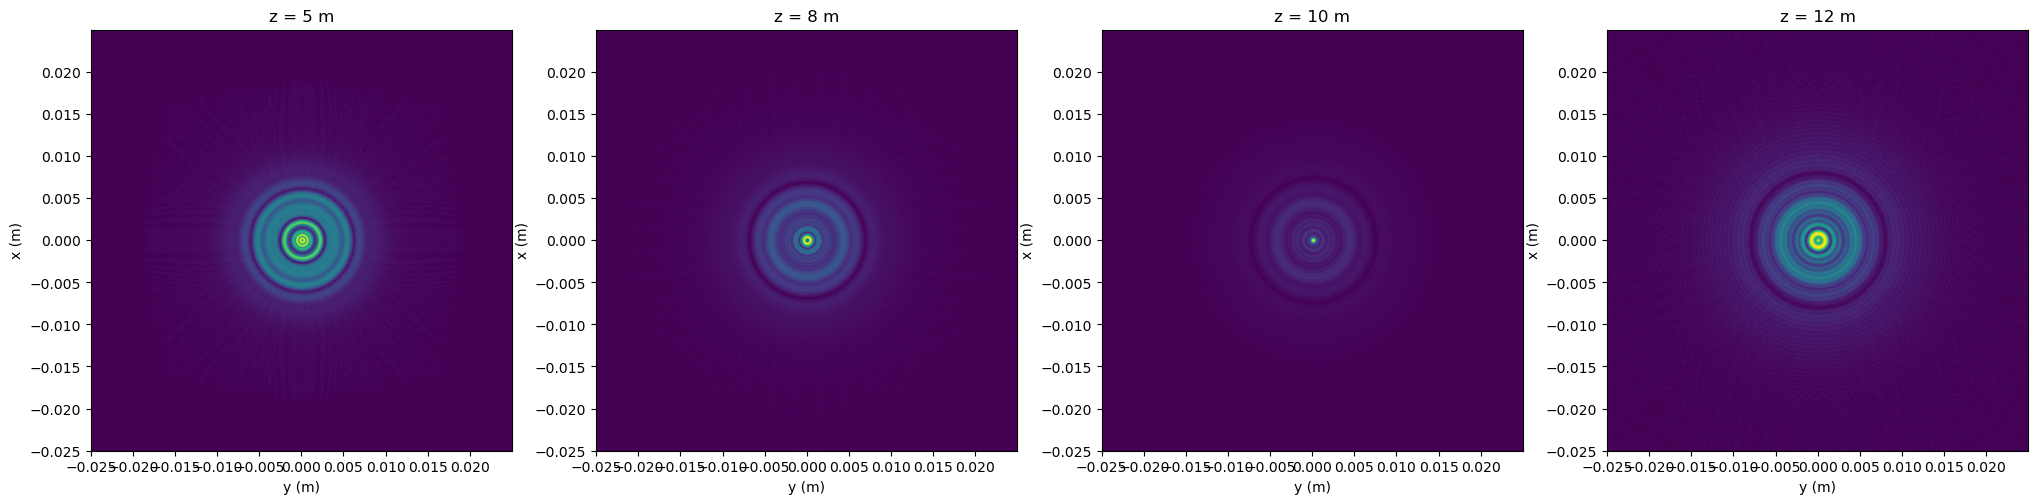

In [97]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25, 8))
ax = axes.ravel()

for ax_idx, z in enumerate([5, 8, 10, 12]*METER):
    u1 = zoneplate(np.ones_like(X), L, wavelength, f, w)
    if z <= 10:
        u2 = FresnelpropTF(u1, L, wavelength, z)
    elif z > 10:
        u2 = FresnelpropIR(u1, L, wavelength, z)
    I2 = np.abs(u2)**2
    
    ax[ax_idx].imshow(I2**0.5, extent=(-L/2, L/2, -L/2, L/2))
    # ax[ax_idx].axis('equal')
    ax[ax_idx].set_xlabel('y (m)')
    ax[ax_idx].set_ylabel('x (m)')
    ax[ax_idx].set_xticks(x[::50])
    ax[ax_idx].set_yticks(x[::50])
    ax[ax_idx].set_title(f'z = {z} m')
    
plt.show()



### (f, g, h)

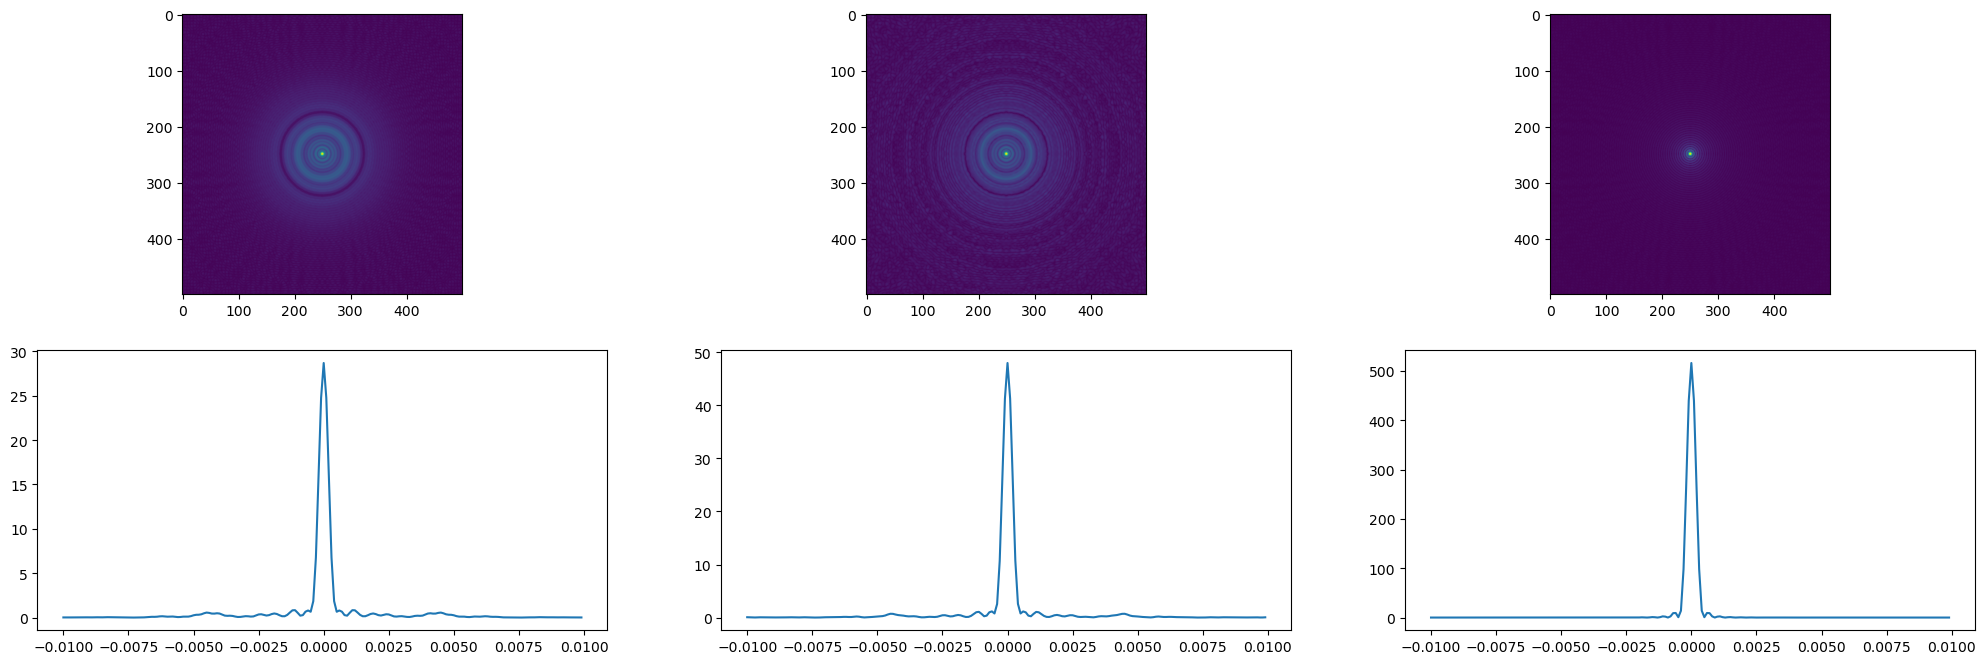

In [144]:
METER = 1
MM = METER * 1e-3
UM = METER * 1e-6
NM = METER * 1e-9

wavelength = 0.5 * UM
L = 50 * MM
M = 500
dx = L / M
w = 6.25 * MM
f = 10 * METER
z = 10 * METER
x = np.linspace(-L/2, L/2-dx, M, endpoint=True)
X, Y = np.meshgrid(x, x)


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 8))
ax = axes.ravel()


ucos = zoneplate(np.ones_like(X), L, wavelength, f, w)
ucos2 = FresnelpropTF(ucos, L, wavelength, z)
Icos = np.abs(ucos2)**2

usigncos = signzoneplate(np.ones_like(X), L, wavelength, f, w)
usigncos2 = FresnelpropTF(usigncos, L, wavelength, z)
Isign = np.abs(usigncos2)**2

# ulens = focus(circle_func(X, Y, w), L, wavelength, f)
# ulens2 = FresnelpropTF(ulens, L, wavelength, z)
ulens2, L2 = FraunhoferProp(circle_func(X, Y, w), L, wavelength, f)
dx2 = L2/M
x2 = np.linspace(-L2/2, L2/2-dx2, M, endpoint=True)
Ilens = np.abs(ulens2)**2

ax[0].imshow(Icos**0.3)
ax[1].imshow(Isign**0.3)
ax[2].imshow(Ilens**0.3)
ax[3].plot(x[150:350], Icos[int(M/2+1), 150:350])
ax[4].plot(x[150:350], Isign[int(M/2+1), 150:350])
ax[5].plot(x2[150:350], Ilens[int(M/2+1), 150:350])

plt.show()

## 6.7

### (a)

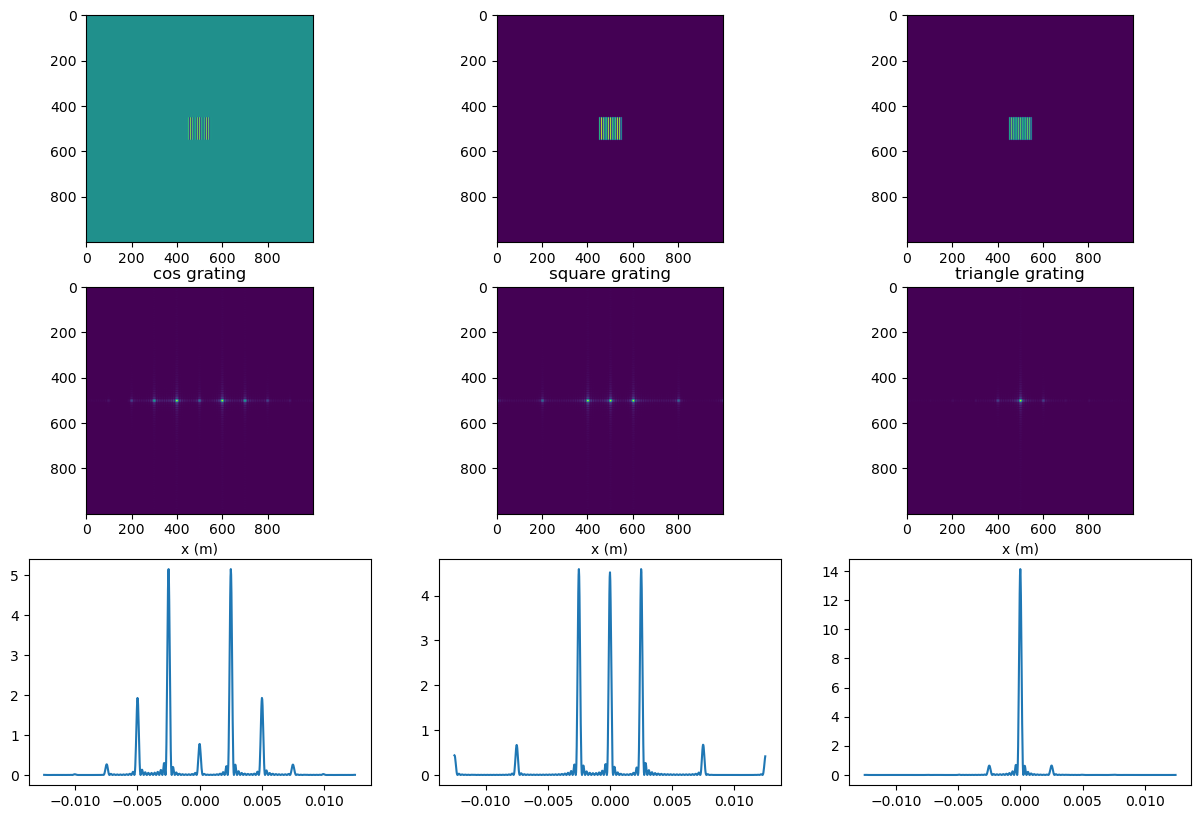

In [50]:
METER = 1
UM = METER * 1e-6
NM = METER * 1e-9

wavelength = 0.5 * UM
f = 0.5 * METER # propagation distance
P = 1e-4 * METER # grating period
D = 1e-3 * METER # grating side length

m = np.pi/2

L1 = 1e-2 * METER # array side length
M = 1000  # Num samples
dx1 = L1/M # sample interval
x1 = np.linspace(-L1/2, L1/2-dx1, M, endpoint=True)
X, Y = np.meshgrid(x1, x1)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
ax = axes.ravel()

for idx, grating_type in enumerate(['cos', 'square', 'triangle']):
    
    if grating_type=='cos':
        u1 = cosPhaseGrating(X=X, Y=Y, P=P, D=D, m=m)
    elif grating_type=='square':
        u1 = squarePhaseGrating(X=X, Y=Y, P=P, D=D, m=m)
    elif grating_type=='triangle':
        u1 = trianglePhaseGrating(X=X, Y=Y, P=P, D=D, m=np.pi)
    
    I1 = np.abs(u1)**2
    u2, L2 = FraunhoferProp(u1, L1, wavelength, f)
    dx2 = L2/M
    x2 = np.linspace(-L2/2, L2/2-dx2, M, endpoint=True)
    X2, Y2 = np.meshgrid(x2, x2)
    I2 = np.abs(u2)**2
    
    ax[idx].imshow(np.angle(u1))
    
    ax[idx+3].imshow(I2**0.5)
    ax[idx+3].set_xlabel('x (m)')
    # ax[idx].set_xticks(np.arange(-L2/2, L2/2-dx2, dx2*100))
    # ax[idx].set_yticks(np.arange(-L2/2, L2/2+dx2, dx2*100))
    ax[idx+3].set_title(f'{grating_type} grating')    
    
    ax[idx+6].plot(x2, I2[int(M/2-1), :])

plt.show()

## 6.8

### (a)

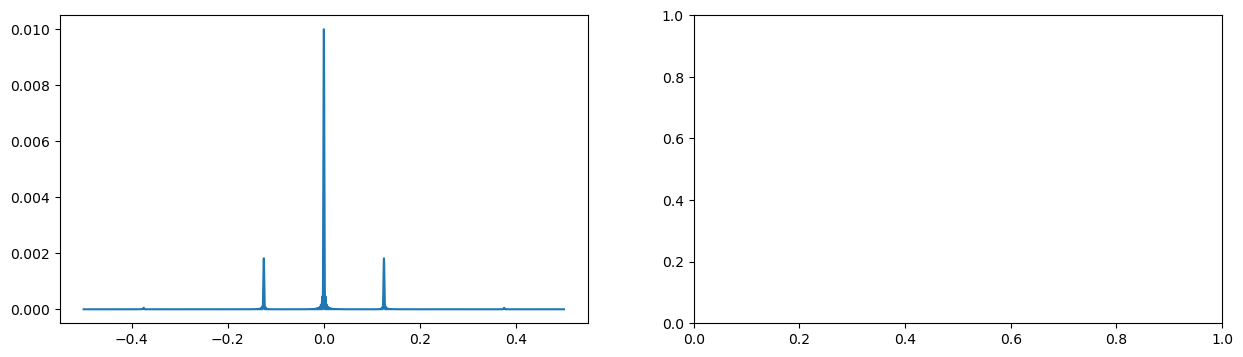

In [36]:
METER = 1
UM = METER * 1e-6
NM = METER * 1e-9
MM = METER * 1e-3

wavelength = 0.5 * UM
f = 0.5 * METER # propagation distance
P = 1/500 * 1e-3 * METER # grating period
D = 0.1 * MM # grating side length

L1 = 0.8e-3 * METER # array side length
M = 3200  # Num samples
dx1 = L1/M # sample interval
x1 = np.linspace(-L1/2, L1/2-dx1, M, endpoint=True)
X, Y = np.meshgrid(x1, x1)

u1 = triangleGrating1D(X, P, D)
u2, L2, dx2, x2 = FraunhoferProp1D(u1, L1, wavelength, f)
I = np.abs(u2)**2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
ax = axes.ravel()

ax[0].plot(x2, I)

# for idx, grating_type in enumerate(['cos', 'square', 'triangle']):
    
#     if grating_type=='cos':
#         u1 = cosPhaseGrating(X=X, Y=Y, P=P, D=D, m=m)
#     elif grating_type=='square':
#         u1 = squarePhaseGrating(X=X, Y=Y, P=P, D=D, m=m)
#     elif grating_type=='triangle':
#         u1 = trianglePhaseGrating(X=X, Y=Y, P=P, D=D, m=m)
    
#     I1 = np.abs(u1)**2
#     u2, L2 = FraunhoferProp(u1, L1, wavelength, f)
#     dx2 = L2/M
#     x2 = np.linspace(-L2/2, L2/2-dx2, M, endpoint=True)
#     X2, Y2 = np.meshgrid(x2, x2)
#     I2 = np.abs(u2)**2
    
#     ax[idx].imshow(np.angle(u1))
    
#     ax[idx+3].imshow(I2**0.5)
#     ax[idx+3].set_xlabel('x (m)')
#     # ax[idx].set_xticks(np.arange(-L2/2, L2/2-dx2, dx2*100))
#     # ax[idx].set_yticks(np.arange(-L2/2, L2/2+dx2, dx2*100))
#     ax[idx+3].set_title(f'{grating_type} grating')    
    
#     ax[idx+6].plot(x2, I2[int(M/2-1), :])

# plt.show()

In [168]:
x.shape

1.004

In [176]:
dx2

2.4999999999999998e-05

In [174]:
np.arange(-L2/2, L2/2-dx2, dx2*2).shape

(500,)

In [60]:
METER = 1
MM = METER * 1e-3
UM = METER * 1e-6
NM = METER * 1e-9

wavelength = 0.5 * UM
L = 6.5*2048/40 * UM
M = 2048
dx = L / M
x = np.linspace(-L/2, L/2-dx, M, endpoint=True)
X, Y = np.meshgrid(x, x)

f = 30 * MM
D_lens = 25 * MM
theta = 0
alpha = 1
z = 70 * MM

# I = np.zeros_like(X)
# for idx, wav in enumerate(np.linspace(500, 699, 1, endpoint=True)):
u1 = circle_func(X, Y, 11/10*UM)
u2 = FresnelpropIR(u1, L, wavelength, f) * circle_func(X, Y, D_lens/2)

u3 = focus(u2, L, wavelength, -f)
u4 = FresnelpropIR(u3, L, wavelength, z)

u5 = tilt(u4, L, wavelength, alpha, theta)

u6, L6 = FraunhoferProp(u5, L, wavelength, z)
dx6 = L6/M
x6 = np.linspace(-L6/2, L6/2-dx6, M, endpoint=True)

u7, L7 = FraunhoferProp(u6, L6, wavelength, f)
dx7 = L7/M
x7 = np.linspace(-L7/2, L7/2-dx7, M, endpoint=True)



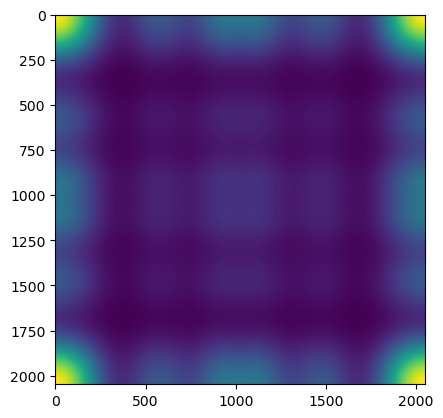

In [62]:
plt.imshow(np.abs(u5)**2)

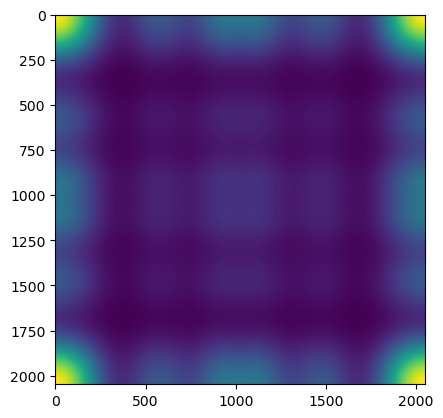

In [55]:
plt.imshow(np.abs(u4)**2)

In [6]:
METER = 1
MM = METER * 1e-3
UM = METER * 1e-6

wavelength = 0.5 * UM
L = 6.5*2048/40 * UM
M = 2048
dx = L / M
x = np.linspace(-L/2, L/2-dx, M, endpoint=True)
X, Y = np.meshgrid(x, x)

f = 30 * MM
D_lens = 25 * MM
theta = 0
alpha = 0
z = 70 * MM

I = np.zeros_like(X)
for idx, wav in enumerate(np.linspace(500, 699, 3, endpoint=True)*NM):
    u1 = circle_func(X, Y, 11/10*UM)
    u2 = FresnelpropIR(u1, L, wav, f) * circle_func(X, Y, D_lens/2)

    u3 = tilt(u2, L, wav, alpha + idx*10, theta)

    u4, L4 = FraunhoferProp(u3, L, wav, f)
    dx4 = L4/M
    x4 = np.linspace(-L4/2, L4/2-dx4, M, endpoint=True)

    I += np.abs(u4)**2 

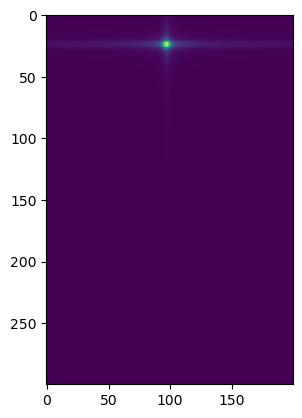

In [16]:
plt.imshow(I[1000:1300, 1100:1300]**0.3)

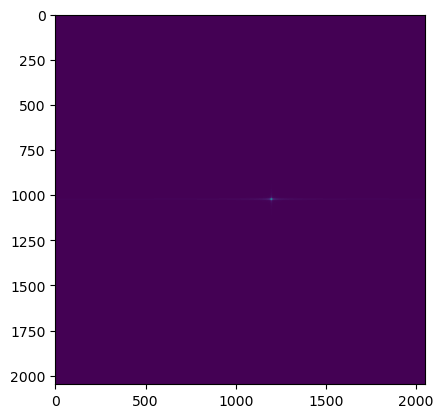

In [8]:
I = np.abs(u4)**2
plt.imshow(I**0.3)

In [150]:
propa_criterion(dx, wavelength, f, L)

dx : 1.625e-07 | wavelength : 5e-07 | propagation distance : 0.03 | sidelength : 0.0003328
criterion (norm.) : 277.36686390532543 | cirterion : 4.507211538461538e-05 
method : IR | TF (H) undersampling, IR (h) oversampling | B1 : 11093.333333333334



'IR'

In [81]:
dx

1.625e-07